# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

*   Nama: Rifky Yudistiansyah
*   Email: rifkyyudistiansyah@gmail.com
*   Id Dicoding: Rifky Yudistiansyah



## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

pd.set_option("display.max_columns", None)

### Menyiapkan data yang akan digunakan

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv')
print('Shape:', df.shape)
df.head()

Shape: (1470, 35)


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [6]:
print('Missing values per column:')
print(df.isna().sum().sort_values(ascending=False))

Missing values per column:
Attrition                   412
EmployeeId                    0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalan

In [7]:
target_col = df['Attrition']
target_col.value_counts(dropna=False).reset_index()

,Attrition,count
0,0.0,879
1,NaN,412
2,1.0,179


In [8]:
# Check the unique values of Categorical Columns

nunique = df.select_dtypes(include='object') \
            .apply(lambda x: x.nunique())

unique = df.select_dtypes(include='object') \
           .apply(lambda x: x.unique())

pd.set_option('max_colwidth', None)
unique_df = pd.concat([nunique, unique], axis=1)
unique_df.rename(columns={0: 'Unique_Counts', 1: 'Unique_Values'})

,Unique_Counts,Unique_Values
BusinessTravel,3,"[Travel_Frequently, Travel_Rarely, Non-Travel]"
Department,3,"[Human Resources, Research & Development, Sales]"
EducationField,6,"[Other, Medical, Life Sciences, Marketing, Technical Degree, Human Resources]"
Gender,2,"[Male, Female]"
JobRole,9,"[Human Resources, Healthcare Representative, Research Scientist, Sales Executive, Manager, Laboratory Technician, Research Director, Manufacturing Director, Sales Representative]"
MaritalStatus,3,"[Married, Single, Divorced]"
Over18,1,[Y]
OverTime,2,"[Yes, No]"


## Exploratory Data Analysis (EDA)

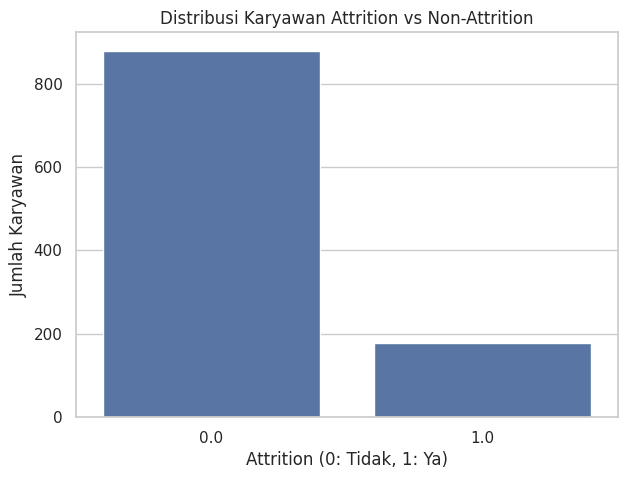

In [9]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Karyawan Attrition vs Non-Attrition')
plt.xlabel('Attrition (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Karyawan')
plt.show()

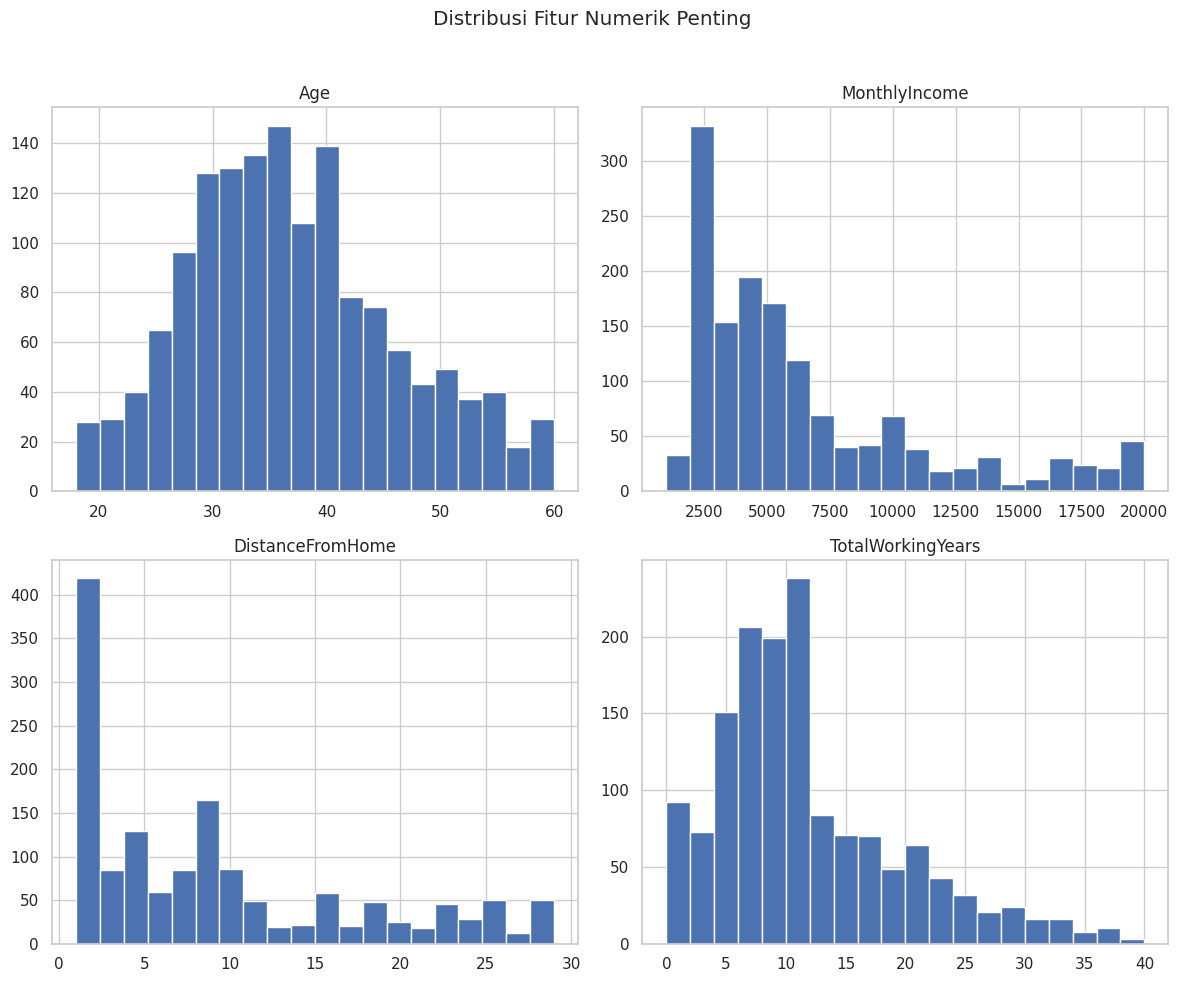

In [10]:
numerical_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears']

df[numerical_features].hist(figsize=(12, 10), bins=20, layout=(2, 2))
plt.suptitle('Distribusi Fitur Numerik Penting')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

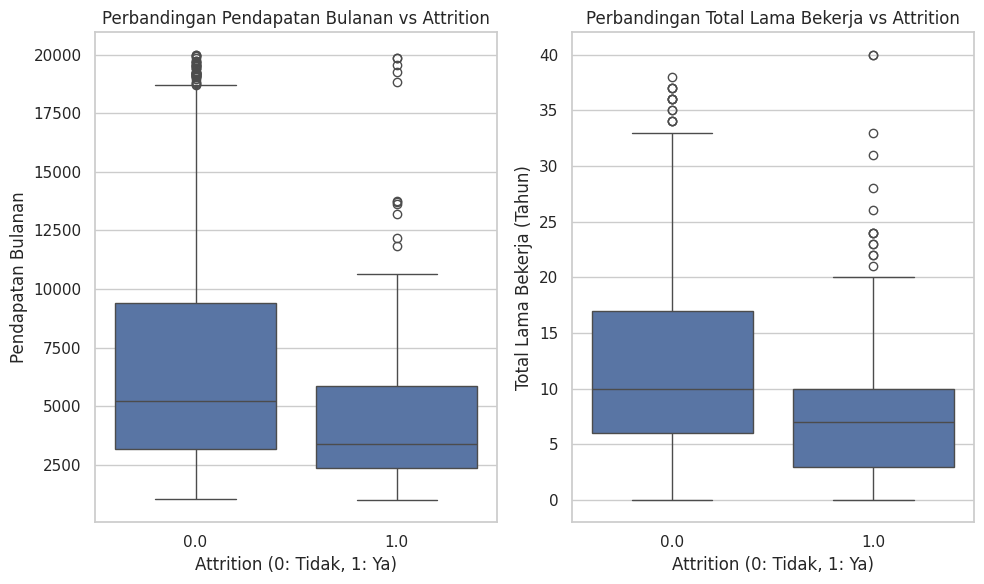

In [11]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Perbandingan Pendapatan Bulanan vs Attrition')
plt.xlabel('Attrition (0: Tidak, 1: Ya)')
plt.ylabel('Pendapatan Bulanan')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title('Perbandingan Total Lama Bekerja vs Attrition')
plt.xlabel('Attrition (0: Tidak, 1: Ya)')
plt.ylabel('Total Lama Bekerja (Tahun)')

plt.tight_layout()
plt.show()

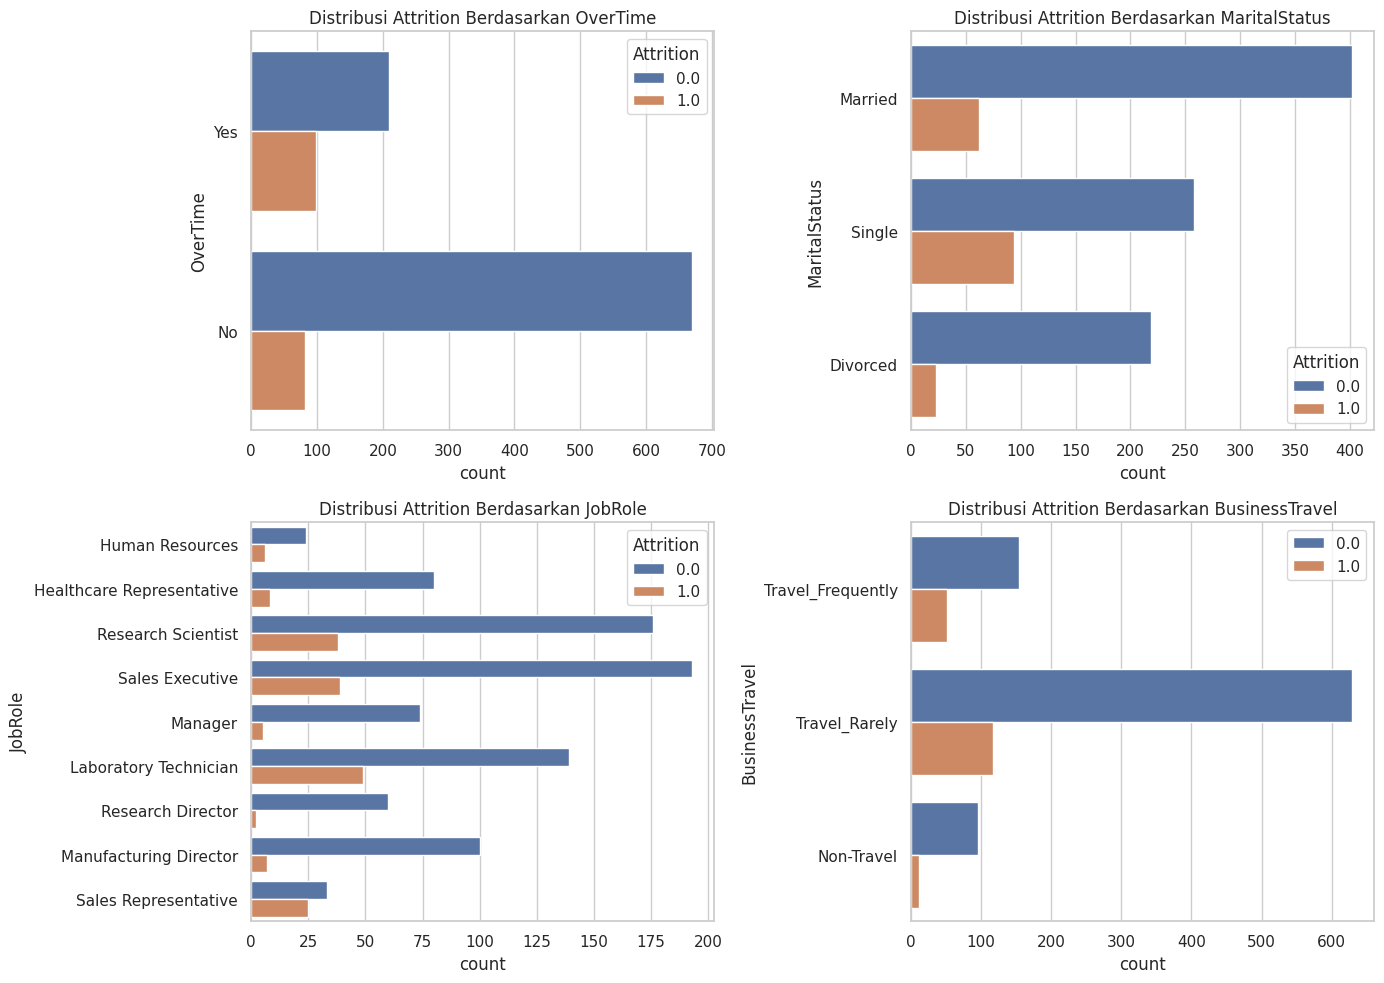

In [12]:
categorical_features_to_plot = ['OverTime', 'MaritalStatus', 'JobRole', 'BusinessTravel']

plt.figure(figsize=(14, 10))

for i, feature in enumerate(categorical_features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=feature, hue='Attrition', data=df)
    plt.title(f'Distribusi Attrition Berdasarkan {feature}')

plt.legend()
plt.tight_layout()
plt.show()

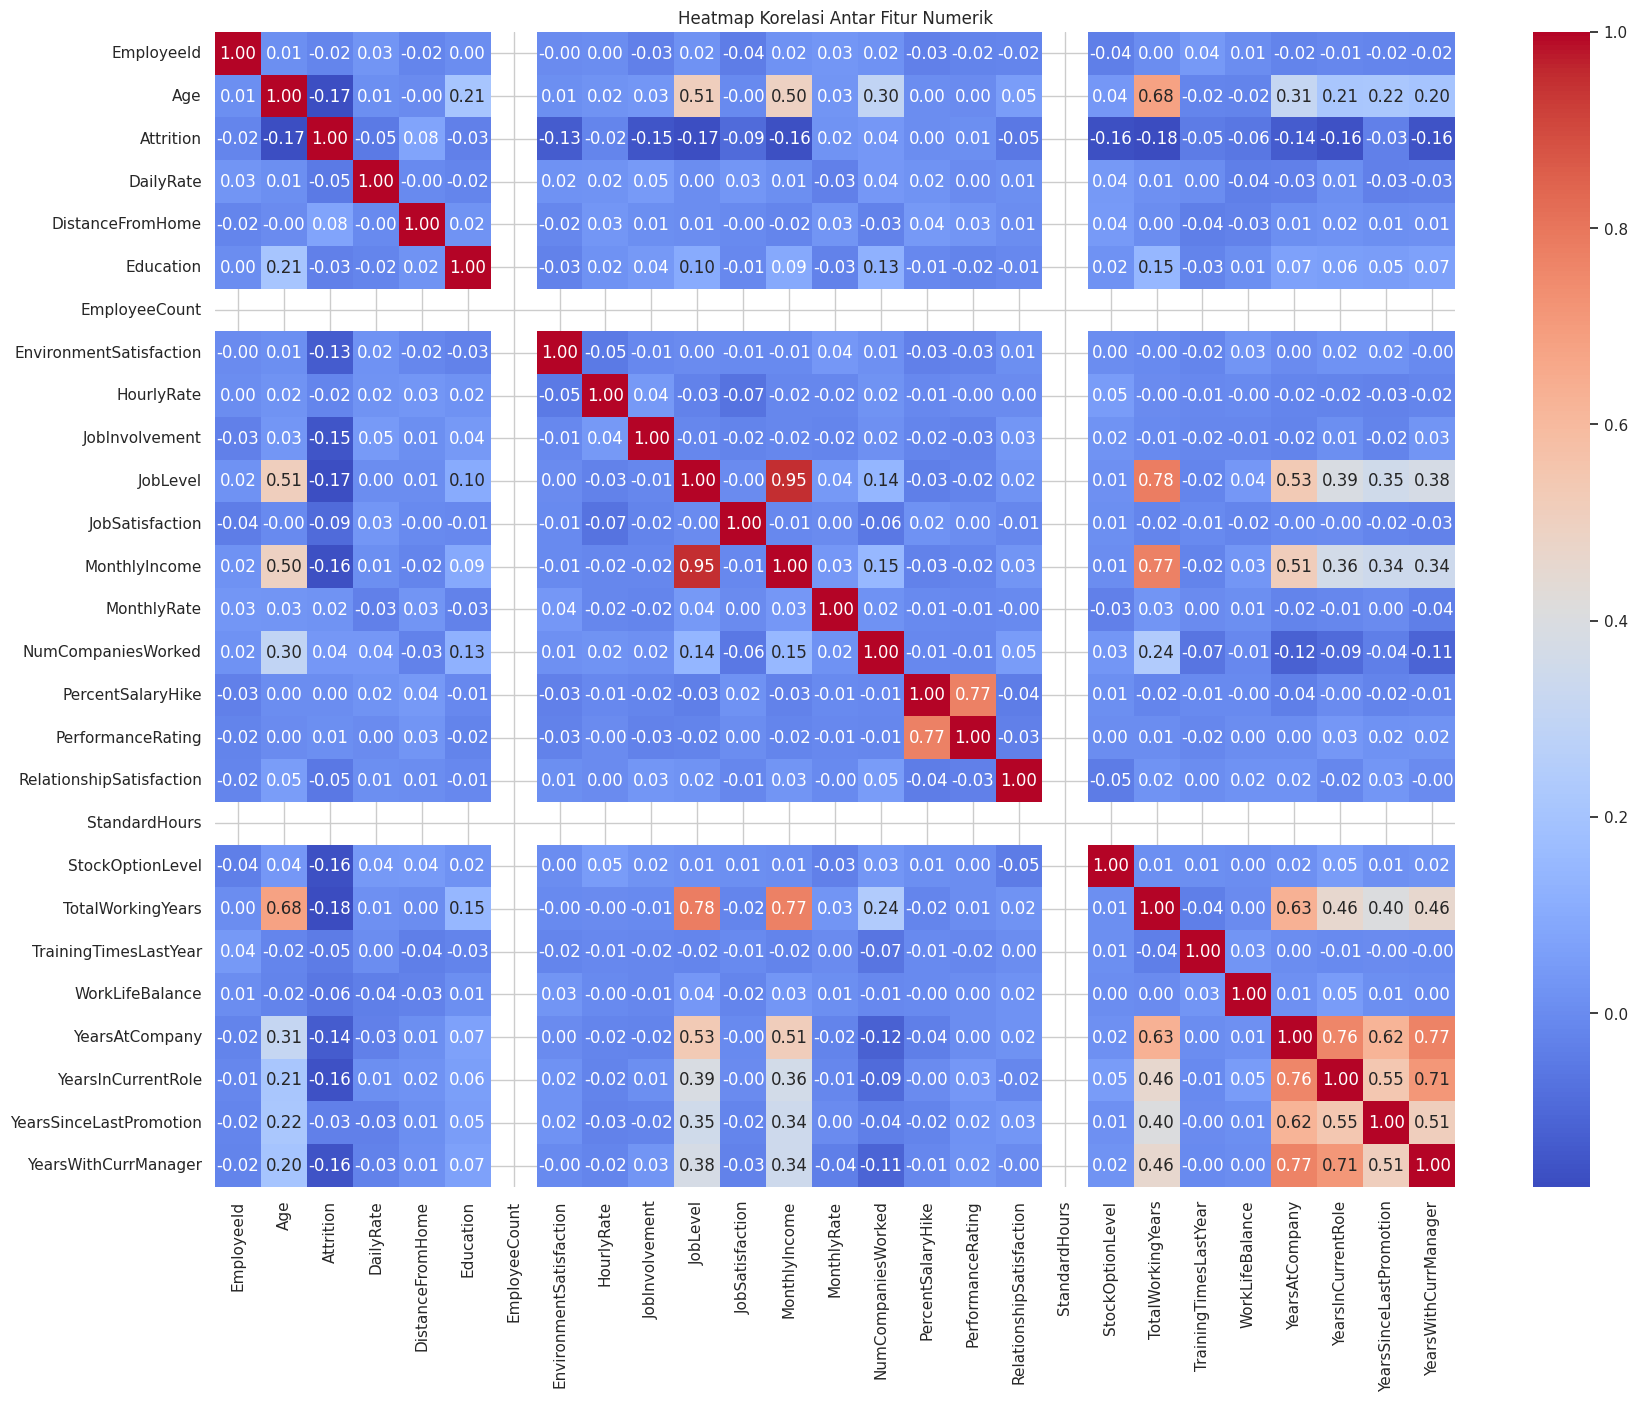

In [13]:
plt.figure(figsize=(20, 15))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

## Data Preparation / Preprocessing

In [14]:
full_df = df.copy()

In [15]:
df_to_predict = df[df['Attrition'].isna()]
df = df[df['Attrition'].notna()].reset_index(drop=True)

In [16]:
# save cleaned data for dashboard
# df.to_csv('employee_data_clean.csv', index=False)

In [17]:
# Drop columns with zero variance ('EmployeeCount', 'StandardHours'), one unique values ('Over18'), and zero informative ('EmployeeId')
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeId'])

In [18]:
num_cols = df.select_dtypes(include='number').drop(columns='Attrition').columns
cat_cols = df.select_dtypes(include='object').columns

In [19]:
# Preprocessor
preprocessor = ColumnTransformer([('num', StandardScaler(), num_cols), ('cat', OneHotEncoder(), cat_cols)])

In [20]:
# Split
X = df.drop(columns='Attrition')
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train/test shapes:', X_train.shape, X_test.shape)

Train/test shapes: (846, 30) (212, 30)


## Modeling

In [21]:
education_level = ['universitas', 'university', 'institut', 'institute', 'insůtute', 'smkn',
                   'smk', 'sma', 'sman', 'politeknik','stmik', 'stm', 'stekom', 'stan', 'stis',
                   'univesity', 'polytechnic', ]

In [22]:
# Logistic Regression
pipe_lr = Pipeline([('pre', preprocessor), ('clf', LogisticRegression(class_weight='balanced'))])
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
y_proba_lr = pipe_lr.predict_proba(X_test)[:,1]
print('ROC-AUC Score: {}'.format(roc_auc_score(y_test, y_proba_lr)))
print('\nClassification report:\n', classification_report(y_test, y_pred_lr, zero_division=0))


ROC-AUC Score: 0.8077651515151515

Classification report:
               precision    recall  f1-score   support

         0.0       0.93      0.73      0.82       176
         1.0       0.36      0.75      0.49        36

    accuracy                           0.73       212
   macro avg       0.65      0.74      0.65       212
weighted avg       0.84      0.73      0.76       212



In [23]:
# RandomForest
pipe_rf = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(n_estimators=150, max_depth=6, class_weight='balanced', random_state=42, n_jobs=-1))])
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)
y_proba_rf = pipe_rf.predict_proba(X_test)[:,1]
print('ROC-AUC Score: {}'.format(roc_auc_score(y_test, y_proba_rf)))
print('\nClassification report:\n', classification_report(y_test, y_pred_rf, zero_division=0))

ROC-AUC Score: 0.7754103535353536

Classification report:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       176
         1.0       0.55      0.44      0.49        36

    accuracy                           0.84       212
   macro avg       0.72      0.69      0.70       212
weighted avg       0.83      0.84      0.84       212



## Evaluation

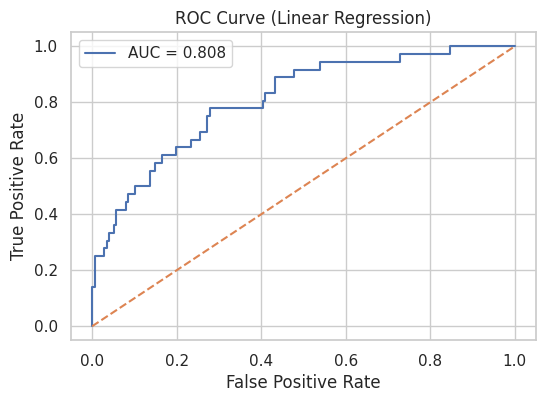

In [24]:
# ROC curve with Logistic Regression prediction
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_to_predict.to_csv('/content/drive/MyDrive/Colab Notebooks/Penerapan-Data-Science_First-Submission /df_to_predict.csv', index=False)

In [ ]:
# save model
joblib.dump(pipe_lr, '/content/drive/MyDrive/Colab Notebooks/Penerapan-Data-Science_First-Submission /model_lr.pkl')

['/content/drive/MyDrive/Colab Notebooks/Penerapan-Data-Science_First-Submission /model_lr.pkl']

# Prediction

In [25]:
!pip install pipreqs

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/Penerapan-Data-Science_First-Submission " --scan-notebooks --force

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/Penerapan-Data-Science_First-Submission /requirements.txt
